In [1]:
import typing

import numpy as np
import matplotlib.pyplot as plt

from utils import *

/home/mrcr4ft/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
def testMLEAndMAP(true_k: int, a: float = 0, b: float = 1, n_train: int = 100, 
                  n_test: int = 100, var: float = 1.0, theta_true: np.ndarray = None, 
                  optimization: str = "gd", regularization_par: float = 1.0, kmax: int = 500,
                  alpha: float = 1e-3):
    if theta_true is None:
        theta_true = np.ones((true_k,))
        
    x,y = testProblem(true_k, n_train, a, b, var, theta_true)
    if true_k == 1 or true_k == 2:
        test_ks = [1, 2, 3, 5, 10]
    elif true_k == 3:
        test_ks = [1, 2, 3, 4, 5, 10, 20]
    else:
        test_ks = list((np.linspace(0, 4, 10) * true_k).astype("int32"))
        test_ks[0] = 1

    estimates_mle = []
    errors_train_mle = []
    errors_test_mle = []
    
    estimates_map = []
    errors_train_map = []
    errors_test_map = []
    
    phi_x = classicalVandermondeMatrix(x, true_k)
    true_y_train = phi_x @ theta_true
    
    x_test = np.random.random(size=(n_test,)) * (b - a) + a
    phi_x = classicalVandermondeMatrix(x_test, true_k)
    epsilon = np.random.normal(loc=0.0, scale=var ** 0.5, size=(n_test,))
    y_test = phi_x @ theta_true + epsilon
    
    for pol_grade in test_ks:
        theta_mle = MLEPolynomialRegression((x,y), pol_grade, regularization_par, optimization, alpha, kmax)
        theta_map = MAPPolynomialRegression((x,y), pol_grade, regularization_par, optimization, alpha, kmax)
        
        phi_x = classicalVandermondeMatrix(x, pol_grade)
        y_test_pred_mle = phi_x @ theta_mle
        y_test_pred_map = phi_x @ theta_map
        
        error_train_mle = polynomialRegressorError((x, y), theta_mle)
        error_train_map = polynomialRegressorError((x, y), theta_map)
        error_test_mle = polynomialRegressorError((x_test, y_test), theta_mle)
        error_test_map = polynomialRegressorError((x_test, y_test), theta_map)
        
        estimates_mle.append(theta_mle)
        estimates_map.append(theta_map)
        errors_train_mle.append(error_train_mle)
        errors_train_map.append(error_train_map)
        errors_test_mle.append(error_test_mle)
        errors_test_map.append(error_test_map)
        
        plt.scatter(x, y, c="red", label="Training observations")
        plt.scatter(x_test, y_test, c="blue", label="Testing observations")
        plt.plot(x, y_test_pred_mle, c="green", label="Predictions on the test set (MLE)")
        plt.plot(x, y_test_pred_map, c="yellow", label="Predictions on the test set (MAP, lambda=%d)" % regularization_par)
        plt.plot(x, true_y_train, c="black", label="True mean")
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("MLE and MAP Polynomial Regression with assumption of underlying Gaussian noise and polynomial degree equal to %d (true polynomial degree is: %d)" % (pol_grade, true_k))
        plt.show()
        
    plt.plot(test_ks, errors_train_mle, c="blue", label="Error on the training set")
    plt.plot(test_ks, errors_test_mle, c="red", label="Error on the test set")
    plt.xlabel("polynomial degree")
    plt.ylabel("mean absolute error")
    plt.title("MAE as a function of the degree of the fitted polynomial (MLE estimation)")
    plt.legend()
    plt.show()
    
    plt.plot(test_ks, errors_train_mle, c="blue", label="Error on the training set")
    plt.plot(test_ks, errors_test_mle, c="red", label="Error on the test set")
    plt.xlabel("polynomial degree")
    plt.ylabel("mean absolute error")
    plt.title("MAE as a function of the degree of the fitted polynomial (MAP estimation with lambda = %d)" % regularization_par)
    plt.legend()
    plt.show()
    
    err_theta_mle = []
    err_theta_map = []
    ks_greater = []
    for idx, k in enumerate(test_ks):
        if k > true_k:
            true_theta_padded = np.zeros((k,))
            true_theta_padded[:true_k] = theta_true
            error_mle = np.linalg.norm(estimates_mle[idx] - true_theta_padded) / np.linalg.norm(true_theta_padded)
            error_map = np.linalg.norm(estimates_map[idx] - true_theta_padded) / np.linalg.norm(true_theta_padded)
            err_theta_mle.append(error_mle)
            err_theta_map.append(error_map)
            ks_greater.append(k)
            
    plt.plot(ks_greater, err_theta_mle, c="blue", label="MLE estimation")
    plt.plot(ks_greater, err_theta_map, c="red", label="MAP estimation with lambda = %d" % regularization_par)
    plt.xlabel("polynomial degree")
    plt.ylabel("error")
    plt.title("Error of theta as a function of the degree of the fitted polynomial")
    plt.legend()
    plt.show()

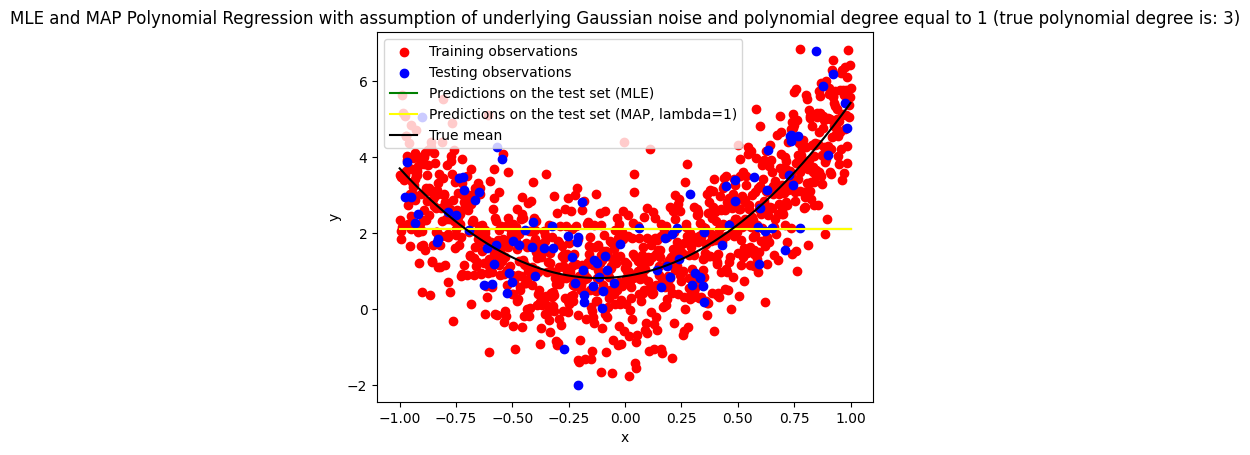

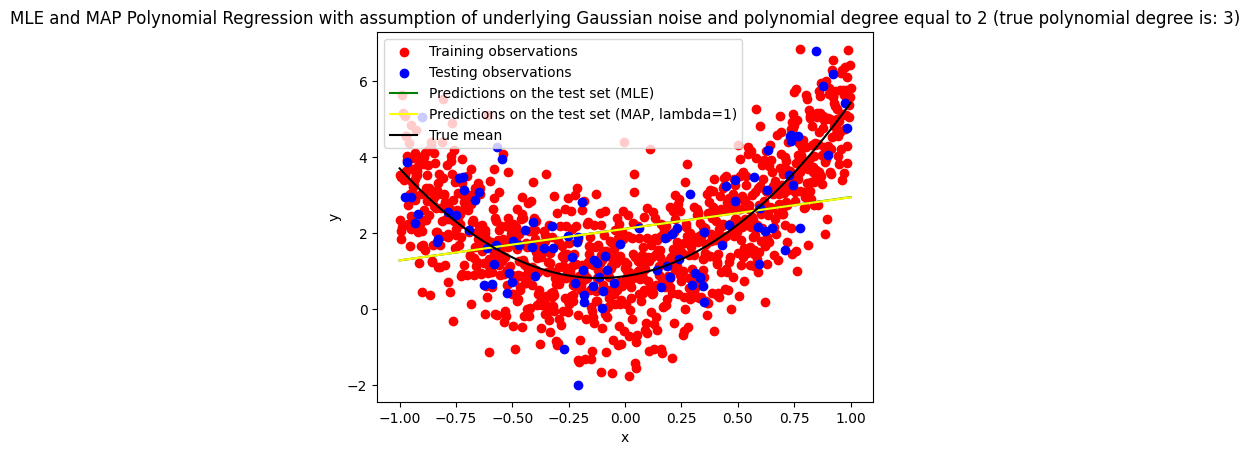

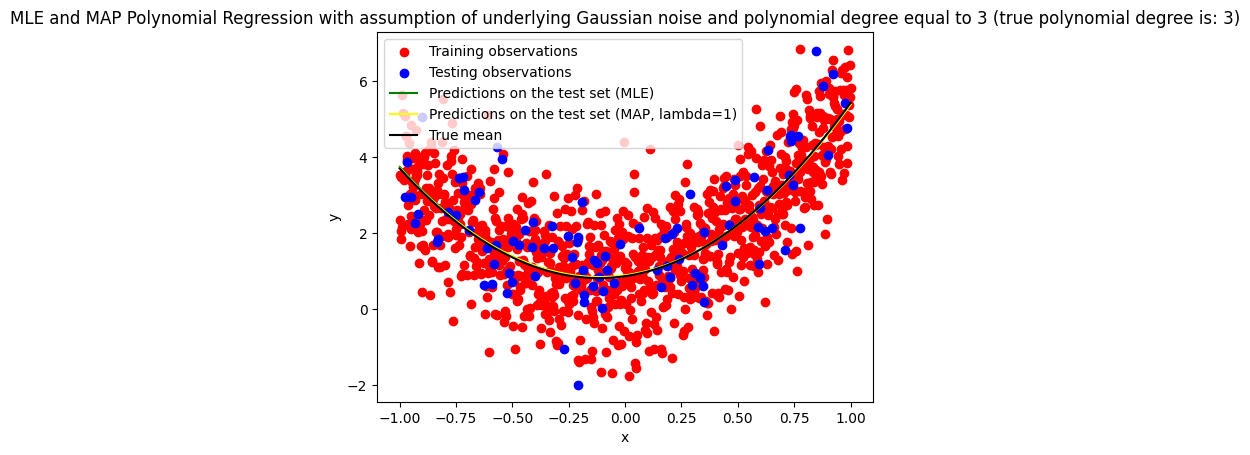

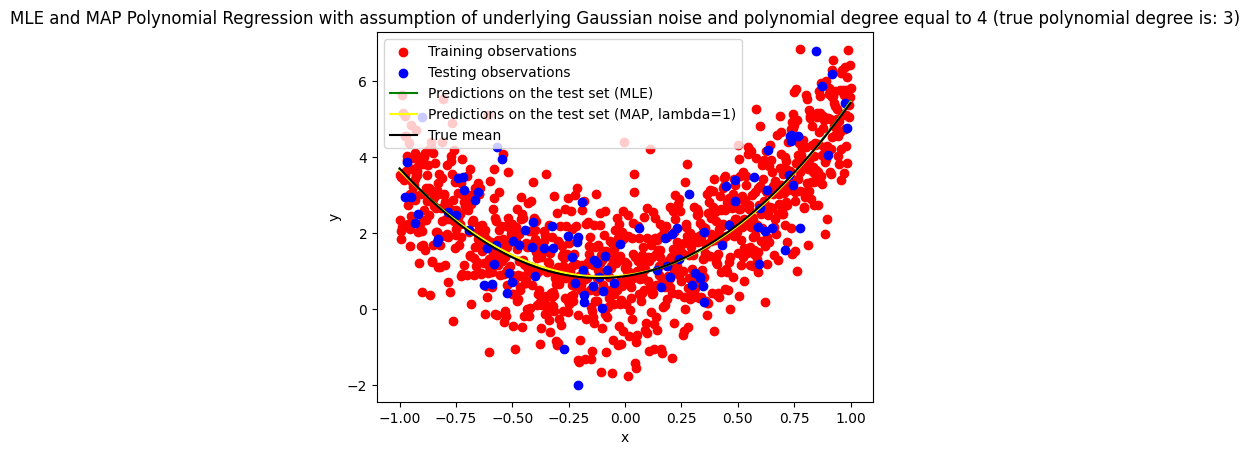

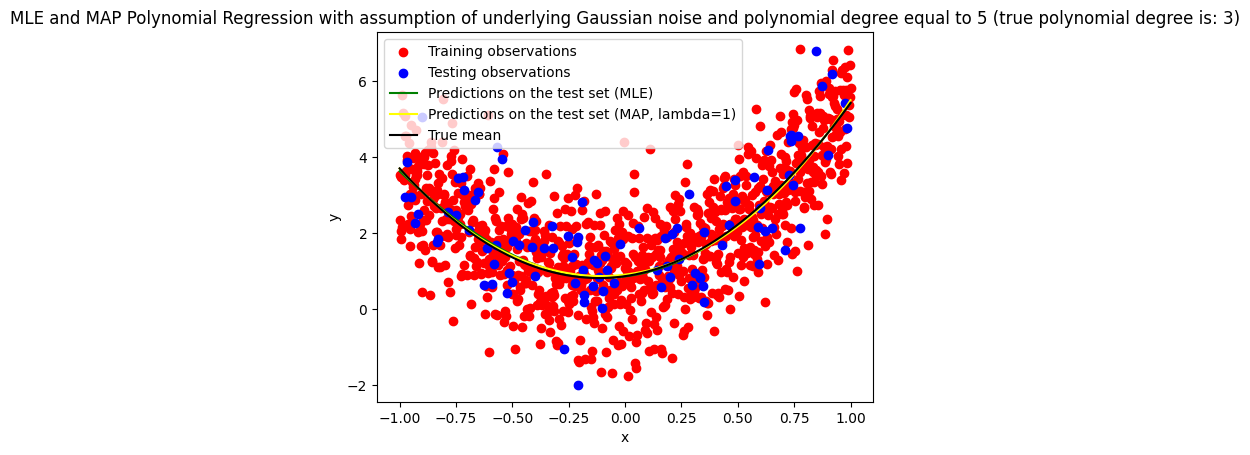

In [ ]:
testMLEAndMAP(3, a=-1, b=1, n_train=1000, n_test=100,theta_true=np.random.normal(0, 3, 3), optimization="gd", kmax=1000, regularization_par=1)

In [ ]:
plt.scatter(x, y, c="red")